In [58]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [59]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv')

In [60]:
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [61]:
df.columns = df.columns.str.lower()
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [62]:
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}

df.status = df.status.map(status_values)
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,1,60,30,2,1,3,73,129,0,0,800,846
1,ok,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,default,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,ok,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,ok,0,1,36,26,1,1,1,46,107,0,0,310,910


In [63]:
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

In [64]:
marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

In [65]:
records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

In [66]:
job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

In [67]:
df.head()


,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [68]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [69]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=np.nan)

In [70]:
df.isnull().sum()

status        0
seniority     0
home          0
time          0
age           0
marital       0
records       0
job           0
expenses      0
income       34
assets       47
debt         18
amount        0
price         0
dtype: int64

In [71]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [72]:
df.status.value_counts()

ok         3200
default    1254
unk           1
Name: status, dtype: int64

In [73]:
df = df[df.status != 'unk']

In [74]:
df.isnull().sum()

status        0
seniority     0
home          0
time          0
age           0
marital       0
records       0
job           0
expenses      0
income       34
assets       47
debt         18
amount        0
price         0
dtype: int64

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=11)

In [77]:
y_train = (df_train.status == 'default').values
y_val = (df_val.status == 'default').values

In [78]:
del df_train['status']
del df_val['status']

In [79]:
len(df_train), len(df_val), len(df_test)

(2672, 891, 891)

In [80]:
from sklearn.feature_extraction  import DictVectorizer

In [81]:
df_train.isnull().sum()


seniority     0
home          0
time          0
age           0
marital       0
records       0
job           0
expenses      0
income       25
assets       30
debt         11
amount        0
price         0
dtype: int64

In [82]:
dict_train = df_train.fillna(0).to_dict(orient='records')
dict_val = df_val.fillna(0).to_dict(orient='records')

In [83]:
dict_train[0]

{'seniority': 10,
 'home': 'owner',
 'time': 36,
 'age': 36,
 'marital': 'married',
 'records': 'no',
 'job': 'freelance',
 'expenses': 75,
 'income': 0.0,
 'assets': 10000.0,
 'debt': 0.0,
 'amount': 1000,
 'price': 1400}

In [84]:
dict_val[0]

{'seniority': 6,
 'home': 'rent',
 'time': 36,
 'age': 31,
 'marital': 'separated',
 'records': 'no',
 'job': 'fixed',
 'expenses': 49,
 'income': 140.0,
 'assets': 0.0,
 'debt': 0.0,
 'amount': 550,
 'price': 999}

In [85]:
dv = DictVectorizer(sparse = False)
X_train = dv.fit_transform(dict_train)
X_val = dv.transform(dict_val)

In [86]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [87]:
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

1.0

In [88]:
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.6618270325252477

In [89]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)

y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train auc: %.3f' % auc)

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('val auc: %.3f' % auc)

train auc: 0.705
val auc: 0.669


In [90]:
dt = DecisionTreeClassifier(max_depth=6)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [91]:
y_pred = dt.predict_proba(X_val)[:, 1]

In [92]:
roc_auc_score(y_val, y_pred)

0.7453773219345621

In [93]:
for depth in [1, 2, 3, 4, 5, 6, 10, 15, 20, None]:
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print('%4s -> %.3f' % (depth, auc))

   1 -> 0.606
   2 -> 0.669
   3 -> 0.739
   4 -> 0.761
   5 -> 0.766
   6 -> 0.758
  10 -> 0.705
  15 -> 0.666
  20 -> 0.667
None -> 0.665


In [94]:
for m in [1, 5, 10, 15, 20, 50, 100, 200]:
    dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=m)
    dt.fit(X_train, y_train)
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print('%s -> %.3f' % (m, auc))

1 -> 0.761
5 -> 0.761
10 -> 0.761
15 -> 0.764
20 -> 0.761
50 -> 0.753
100 -> 0.756
200 -> 0.747


In [95]:
for m in [4, 5, 6]:
    print('depth: %s' % m)

    for s in [1, 5, 10, 15, 20, 50, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=m, min_samples_leaf=s)
        dt.fit(X_train, y_train)
        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        print('%s -> %.3f' % (s, auc))
    
    print()

depth: 4
1 -> 0.761
5 -> 0.761
10 -> 0.761
15 -> 0.764
20 -> 0.761
50 -> 0.753
100 -> 0.756
200 -> 0.747

depth: 5
1 -> 0.766
5 -> 0.768
10 -> 0.762
15 -> 0.772
20 -> 0.774
50 -> 0.768
100 -> 0.763
200 -> 0.759

depth: 6
1 -> 0.761
5 -> 0.760
10 -> 0.778
15 -> 0.786
20 -> 0.774
50 -> 0.770
100 -> 0.776
200 -> 0.768



In [96]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred_dt)

0.7850954203095104

In [97]:
from sklearn.metrics import roc_curve


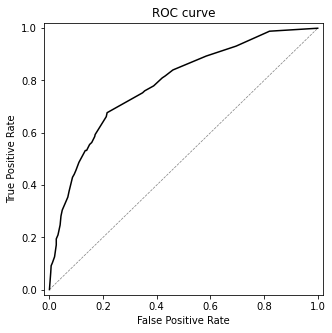

In [98]:
fpr, tpr, _ = roc_curve(y_val, y_pred_dt)

plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, color='black')
plt.plot([0, 1], [0, 1], color='black', lw=0.7, linestyle='dashed', alpha=0.5)

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC curve')

plt.show()

In [99]:
from sklearn.ensemble import RandomForestClassifier

In [100]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7910440531835023

In [101]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7770640091061005

In [102]:
aucs = []

for i in range(100):
    rf = RandomForestClassifier(n_estimators=10)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    aucs.append(auc)

auc_mean = np.mean(aucs)
auc_std = np.std(aucs)

print('%.3f +- %.3f' % (auc_mean, auc_std))
print('%.3f -- %.3f' % (auc_mean -  auc_std, auc_mean + auc_std))

0.786 +- 0.009
0.777 -- 0.796


In [103]:
rf = RandomForestClassifier(n_estimators=10, random_state=3)
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7811145285897654

In [104]:
aucs = []

for i in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=i, random_state=3)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print('%s -> %.3f' % (i, auc))
    aucs.append(auc)

10 -> 0.781
20 -> 0.801
30 -> 0.813
40 -> 0.815
50 -> 0.816
60 -> 0.817
70 -> 0.818
80 -> 0.818
90 -> 0.820
100 -> 0.819
110 -> 0.819
120 -> 0.821
130 -> 0.822
140 -> 0.822
150 -> 0.820
160 -> 0.820
170 -> 0.819
180 -> 0.820
190 -> 0.820
200 -> 0.820


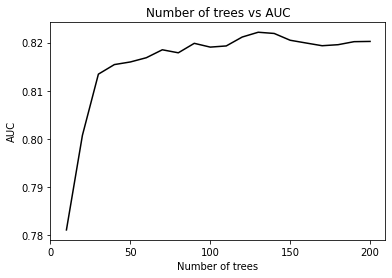

In [105]:
plt.figure(figsize=(6, 4))

plt.plot(range(10, 201, 10), aucs, color='black')
plt.xticks(range(0, 201, 50))

plt.title('Number of trees vs AUC')
plt.xlabel('Number of trees')
plt.ylabel('AUC')

# plt.savefig('ch06-figures/06_random_forest_n_estimators.svg')

plt.show()

In [106]:
all_aucs = {}

for depth in [5, 10, 20]:
    print('depth: %s' % depth)
    aucs = []

    for i in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=i, max_depth=depth, random_state=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        print('%s -> %.3f' % (i, auc))
        aucs.append(auc)
    
    all_aucs[depth] = aucs
    print()

depth: 5
10 -> 0.788
20 -> 0.798
30 -> 0.800
40 -> 0.800
50 -> 0.800
60 -> 0.801
70 -> 0.802
80 -> 0.803
90 -> 0.804
100 -> 0.804
110 -> 0.807
120 -> 0.806
130 -> 0.808
140 -> 0.807
150 -> 0.807
160 -> 0.807
170 -> 0.807
180 -> 0.807
190 -> 0.807
200 -> 0.807

depth: 10
10 -> 0.791
20 -> 0.808
30 -> 0.812
40 -> 0.818
50 -> 0.817
60 -> 0.819
70 -> 0.820
80 -> 0.820
90 -> 0.820
100 -> 0.821
110 -> 0.823
120 -> 0.823
130 -> 0.825
140 -> 0.824
150 -> 0.824
160 -> 0.825
170 -> 0.825
180 -> 0.825
190 -> 0.825
200 -> 0.825

depth: 20
10 -> 0.776
20 -> 0.803
30 -> 0.813
40 -> 0.817
50 -> 0.815
60 -> 0.813
70 -> 0.814
80 -> 0.815
90 -> 0.814
100 -> 0.815
110 -> 0.817
120 -> 0.816
130 -> 0.818
140 -> 0.818
150 -> 0.818
160 -> 0.818
170 -> 0.817
180 -> 0.817
190 -> 0.817
200 -> 0.818



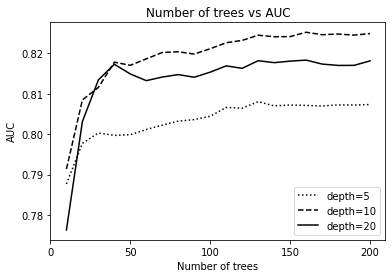

In [107]:
plt.figure(figsize=(6, 4))

num_trees = list(range(10, 201, 10))

plt.plot(num_trees, all_aucs[5], label='depth=5', color='black', linestyle='dotted')
plt.plot(num_trees, all_aucs[10], label='depth=10', color='black', linestyle='dashed')
plt.plot(num_trees, all_aucs[20], label='depth=20', color='black', linestyle='solid')
    
plt.xticks(range(0, 201, 50))
plt.legend()

plt.title('Number of trees vs AUC')
plt.xlabel('Number of trees')
plt.ylabel('AUC')

# plt.savefig('ch06-figures/06_random_forest_n_estimators_depth.svg')

plt.show()

In [108]:
all_aucs = {}

for m in [3, 5, 10]:
    print('min_samples_leaf: %s' % m)
    aucs = []

    for i in range(10, 201, 20):
        rf = RandomForestClassifier(n_estimators=i, max_depth=10, min_samples_leaf=m, random_state=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        print('%s -> %.3f' % (i, auc))
        aucs.append(auc)
    
    all_aucs[m] = aucs
    print()

min_samples_leaf: 3
10 -> 0.811
30 -> 0.823
50 -> 0.823
70 -> 0.822
90 -> 0.823
110 -> 0.823
130 -> 0.824
150 -> 0.825
170 -> 0.825
190 -> 0.825

min_samples_leaf: 5
10 -> 0.813
30 -> 0.818
50 -> 0.821
70 -> 0.822
90 -> 0.822
110 -> 0.825
130 -> 0.825
150 -> 0.825
170 -> 0.825
190 -> 0.826

min_samples_leaf: 10
10 -> 0.810
30 -> 0.822
50 -> 0.822
70 -> 0.819
90 -> 0.820
110 -> 0.820
130 -> 0.821
150 -> 0.820
170 -> 0.820
190 -> 0.820



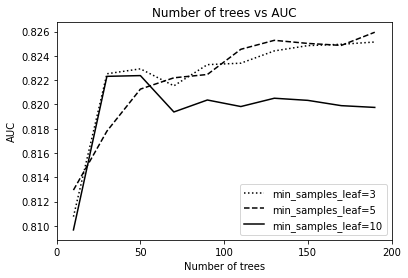

In [109]:
plt.figure(figsize=(6, 4))

num_trees = list(range(10, 201, 20))

plt.plot(num_trees, all_aucs[3], label='min_samples_leaf=3', color='black', linestyle='dotted')
plt.plot(num_trees, all_aucs[5], label='min_samples_leaf=5', color='black', linestyle='dashed')
plt.plot(num_trees, all_aucs[10], label='min_samples_leaf=10', color='black', linestyle='solid')
    
plt.xticks(range(0, 201, 50))
plt.legend()

plt.title('Number of trees vs AUC')
plt.xlabel('Number of trees')
plt.ylabel('AUC')

# plt.savefig('ch06-figures/06_random_forest_n_estimators_sample_leaf.svg')


plt.show()

In [110]:
rf = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_leaf=5, random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=200,
                       random_state=1)

In [111]:
y_pred_rf = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred_rf)

0.8253826499721489

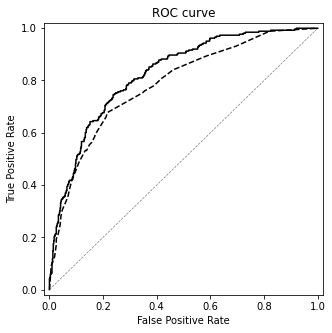

In [112]:
plt.figure(figsize=(5, 5))

fpr, tpr, _ = roc_curve(y_val, y_pred_rf)
plt.plot(fpr, tpr, color='black')

fpr, tpr, _ = roc_curve(y_val, y_pred_dt)
plt.plot(fpr, tpr, color='black', linestyle='dashed')

plt.plot([0, 1], [0, 1], color='black', lw=0.7, linestyle='dashed', alpha=0.5)

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC curve')

plt.show()

In [113]:
import xgboost as xgb

In [114]:
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=dv.feature_names_)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=dv.feature_names_)

In [115]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'nthread': 8,
    'seed': 1
}

In [116]:
model = xgb.train(xgb_params, dtrain, num_boost_round=10)


[11:11:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [117]:
y_pred = model.predict(dval)
y_pred[:10]

array([0.08926772, 0.0468099 , 0.09692743, 0.17261842, 0.05435968,
       0.12576081, 0.08033007, 0.61870354, 0.486538  , 0.04056795],
      dtype=float32)

In [118]:
roc_auc_score(y_val, y_pred)


0.8152745150274878

In [119]:
watchlist = [(dtrain, 'train'), (dval, 'val')]


In [120]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1
}

In [121]:
model = xgb.train(xgb_params, dtrain,
                  num_boost_round=100,
                  evals=watchlist, verbose_eval=10)

[0]	train-auc:0.86300	val-auc:0.76818
[10]	train-auc:0.95002	val-auc:0.81558
[20]	train-auc:0.97316	val-auc:0.81775
[30]	train-auc:0.98772	val-auc:0.81788
[40]	train-auc:0.99456	val-auc:0.81387
[50]	train-auc:0.99688	val-auc:0.81128
[60]	train-auc:0.99889	val-auc:0.80801
[70]	train-auc:0.99944	val-auc:0.80732
[80]	train-auc:0.99985	val-auc:0.80677
[90]	train-auc:0.99991	val-auc:0.80637
[99]	train-auc:0.99997	val-auc:0.80546


In [122]:
%%capture output

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=100,
                  evals=watchlist, verbose_eval=5)

In [123]:
def parse_xgb_output(output):
    tree = []
    aucs_train = []
    aucs_val = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        tree.append(it)
        aucs_train.append(train)
        aucs_val.append(val)

    return tree, aucs_train, aucs_val

In [124]:
tree, aucs_train, aucs_val = parse_xgb_output(output)


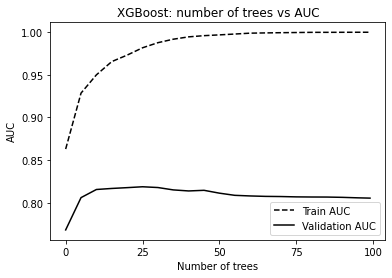

In [125]:
plt.figure(figsize=(6, 4))

plt.plot(tree, aucs_train, color='black', linestyle='dashed', label='Train AUC')
plt.plot(tree, aucs_val, color='black', linestyle='solid', label='Validation AUC')
plt.xticks(range(0, 101, 25))

plt.legend()

plt.title('XGBoost: number of trees vs AUC')
plt.xlabel('Number of trees')
plt.ylabel('AUC')

# plt.savefig('ch06-figures/06_xgb_default.svg')

plt.show()

In [126]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)


[0]	train-auc:0.86300	val-auc:0.76818
[10]	train-auc:0.95002	val-auc:0.81558
[20]	train-auc:0.97316	val-auc:0.81775
[30]	train-auc:0.98772	val-auc:0.81788
[40]	train-auc:0.99456	val-auc:0.81387
[50]	train-auc:0.99688	val-auc:0.81128
[60]	train-auc:0.99889	val-auc:0.80801
[70]	train-auc:0.99944	val-auc:0.80732
[80]	train-auc:0.99985	val-auc:0.80677
[90]	train-auc:0.99991	val-auc:0.80637
[100]	train-auc:0.99999	val-auc:0.80508
[110]	train-auc:1.00000	val-auc:0.80527
[120]	train-auc:1.00000	val-auc:0.80431
[130]	train-auc:1.00000	val-auc:0.80395
[140]	train-auc:1.00000	val-auc:0.80278
[150]	train-auc:1.00000	val-auc:0.80184
[160]	train-auc:1.00000	val-auc:0.80143
[170]	train-auc:1.00000	val-auc:0.80123
[180]	train-auc:1.00000	val-auc:0.80128
[190]	train-auc:1.00000	val-auc:0.80139
[200]	train-auc:1.00000	val-auc:0.80024
[210]	train-auc:1.00000	val-auc:0.80133
[220]	train-auc:1.00000	val-auc:0.80094
[230]	train-auc:1.00000	val-auc:0.80003
[240]	train-auc:1.00000	val-auc:0.80125
[250]	train

In [127]:
tree, _, aucs_val_eta_03 = parse_xgb_output(output)
print(max(aucs_val_eta_03))
print(max(zip(aucs_val_eta_03, tree)))

0.81878
(0.81878, 25)


In [128]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

[0]	train-auc:0.86300	val-auc:0.76818
[10]	train-auc:0.91558	val-auc:0.80009
[20]	train-auc:0.93933	val-auc:0.80920
[30]	train-auc:0.95411	val-auc:0.81557
[40]	train-auc:0.96332	val-auc:0.81843
[50]	train-auc:0.97014	val-auc:0.82348
[60]	train-auc:0.97641	val-auc:0.82446
[70]	train-auc:0.98124	val-auc:0.82476
[80]	train-auc:0.98567	val-auc:0.82329
[90]	train-auc:0.98818	val-auc:0.82363
[100]	train-auc:0.99056	val-auc:0.82371
[110]	train-auc:0.99305	val-auc:0.82355
[120]	train-auc:0.99434	val-auc:0.82208
[130]	train-auc:0.99510	val-auc:0.82079
[140]	train-auc:0.99606	val-auc:0.82025
[150]	train-auc:0.99690	val-auc:0.81946
[160]	train-auc:0.99741	val-auc:0.81907
[170]	train-auc:0.99794	val-auc:0.81839
[180]	train-auc:0.99832	val-auc:0.81830
[190]	train-auc:0.99874	val-auc:0.81711
[200]	train-auc:0.99919	val-auc:0.81770
[210]	train-auc:0.99938	val-auc:0.81719
[220]	train-auc:0.99951	val-auc:0.81622
[230]	train-auc:0.99969	val-auc:0.81467
[240]	train-auc:0.99979	val-auc:0.81416
[250]	train

In [129]:
tree, _, aucs_val_eta_01 = parse_xgb_output(output)
print(max(aucs_val_eta_01))
print(max(zip(aucs_val_eta_01, tree)))

0.81878
(0.81878, 25)


In [131]:
xgb_params = {
    'eta': 0.05,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=5)

In [132]:
tree, _, aucs_val_eta_005 = parse_xgb_output(output)
print(max(aucs_val_eta_005))
print(max(zip(aucs_val_eta_005, tree)))

0.81878
(0.81878, 25)


In [133]:
xgb_params = {
    'eta': 0.01,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

[0]	train-auc:0.86300	val-auc:0.76818
[10]	train-auc:0.87041	val-auc:0.77142
[20]	train-auc:0.87541	val-auc:0.77526
[30]	train-auc:0.88162	val-auc:0.78368
[40]	train-auc:0.88649	val-auc:0.79003
[50]	train-auc:0.89299	val-auc:0.79683
[60]	train-auc:0.90034	val-auc:0.80122
[70]	train-auc:0.90369	val-auc:0.79970
[80]	train-auc:0.90733	val-auc:0.80142
[90]	train-auc:0.91069	val-auc:0.80236
[100]	train-auc:0.91428	val-auc:0.80422
[110]	train-auc:0.91759	val-auc:0.80570
[120]	train-auc:0.92010	val-auc:0.80677
[130]	train-auc:0.92232	val-auc:0.80670
[140]	train-auc:0.92467	val-auc:0.80763
[150]	train-auc:0.92709	val-auc:0.80890
[160]	train-auc:0.92901	val-auc:0.80953
[170]	train-auc:0.93061	val-auc:0.81025
[180]	train-auc:0.93220	val-auc:0.81088
[190]	train-auc:0.93439	val-auc:0.81105
[200]	train-auc:0.93669	val-auc:0.81131
[210]	train-auc:0.93839	val-auc:0.81200
[220]	train-auc:0.93986	val-auc:0.81240
[230]	train-auc:0.94164	val-auc:0.81265
[240]	train-auc:0.94332	val-auc:0.81367
[250]	train

In [134]:
tree, _, aucs_val_eta_001 = parse_xgb_output(output)
print(max(aucs_val_eta_001))
print(max(zip(aucs_val_eta_001, tree)))

0.81878
(0.81878, 25)


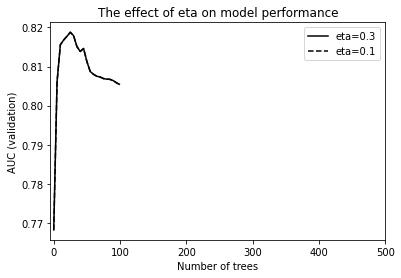

In [135]:
plt.figure(figsize=(6, 4))

plt.plot(tree, aucs_val_eta_03, color='black', linestyle='solid', label='eta=0.3')
plt.plot(tree, aucs_val_eta_01, color='black', linestyle='dashed', label='eta=0.1')
# plt.plot(tree, aucs_val_eta_005, color='grey', linestyle='solid', label='eta=0.05')
# plt.plot(tree, aucs_val_eta_001, color='grey', linestyle='dashed', label='eta=0.01')

plt.xticks(range(0, 501, 100))

plt.legend()

plt.title('The effect of eta on model performance')
plt.xlabel('Number of trees')
plt.ylabel('AUC (validation)')

# plt.savefig('ch06-figures/06_xgb_eta.svg')

plt.show()

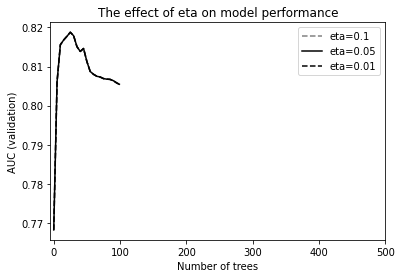

In [136]:
plt.figure(figsize=(6, 4))

plt.plot(tree, aucs_val_eta_01, color='grey', linestyle='dashed', label='eta=0.1')
plt.plot(tree, aucs_val_eta_005, color='black', linestyle='solid', label='eta=0.05')
plt.plot(tree, aucs_val_eta_001, color='black', linestyle='dashed', label='eta=0.01')

plt.xticks(range(0, 501, 100))

plt.legend()

plt.title('The effect of eta on model performance')
plt.xlabel('Number of trees')
plt.ylabel('AUC (validation)')

# plt.savefig('ch06-figures/06_xgb_eta_2.svg')

plt.show()

In [137]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

[0]	train-auc:0.77424	val-auc:0.73571
[10]	train-auc:0.84733	val-auc:0.78964
[20]	train-auc:0.86359	val-auc:0.80617
[30]	train-auc:0.87855	val-auc:0.81478
[40]	train-auc:0.88701	val-auc:0.81990
[50]	train-auc:0.89458	val-auc:0.82595
[60]	train-auc:0.90159	val-auc:0.82807
[70]	train-auc:0.90650	val-auc:0.82801
[80]	train-auc:0.91110	val-auc:0.82940
[90]	train-auc:0.91428	val-auc:0.82997
[100]	train-auc:0.91801	val-auc:0.83221
[110]	train-auc:0.92205	val-auc:0.83290
[120]	train-auc:0.92460	val-auc:0.83285
[130]	train-auc:0.92843	val-auc:0.83414
[140]	train-auc:0.93100	val-auc:0.83463
[150]	train-auc:0.93296	val-auc:0.83525
[160]	train-auc:0.93551	val-auc:0.83554
[170]	train-auc:0.93788	val-auc:0.83638
[180]	train-auc:0.93971	val-auc:0.83657
[190]	train-auc:0.94203	val-auc:0.83562
[200]	train-auc:0.94334	val-auc:0.83512
[210]	train-auc:0.94501	val-auc:0.83546
[220]	train-auc:0.94693	val-auc:0.83508
[230]	train-auc:0.94839	val-auc:0.83417
[240]	train-auc:0.94999	val-auc:0.83336
[250]	train

In [138]:
tree, _, aucs_val_depth3 = parse_xgb_output(output)
print(max(aucs_val_depth3))
print(max(zip(aucs_val_depth3, tree)))

0.81878
(0.81878, 25)


In [139]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 10,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

[0]	train-auc:0.91622	val-auc:0.76613
[10]	train-auc:0.97570	val-auc:0.81168
[20]	train-auc:0.99108	val-auc:0.80901
[30]	train-auc:0.99741	val-auc:0.80641
[40]	train-auc:0.99922	val-auc:0.81045
[50]	train-auc:0.99980	val-auc:0.81009
[60]	train-auc:0.99996	val-auc:0.81102
[70]	train-auc:0.99999	val-auc:0.81013
[80]	train-auc:1.00000	val-auc:0.80991
[90]	train-auc:1.00000	val-auc:0.81114
[100]	train-auc:1.00000	val-auc:0.81169
[110]	train-auc:1.00000	val-auc:0.81056
[120]	train-auc:1.00000	val-auc:0.81076
[130]	train-auc:1.00000	val-auc:0.81117
[140]	train-auc:1.00000	val-auc:0.81065
[150]	train-auc:1.00000	val-auc:0.81078
[160]	train-auc:1.00000	val-auc:0.81108
[170]	train-auc:1.00000	val-auc:0.81091
[180]	train-auc:1.00000	val-auc:0.81051
[190]	train-auc:1.00000	val-auc:0.81040
[200]	train-auc:1.00000	val-auc:0.81097
[210]	train-auc:1.00000	val-auc:0.81068
[220]	train-auc:1.00000	val-auc:0.81028
[230]	train-auc:1.00000	val-auc:0.80984
[240]	train-auc:1.00000	val-auc:0.81012
[250]	train

In [140]:
tree, _, aucs_val_depth10 = parse_xgb_output(output)
print(max(aucs_val))
print(max(zip(aucs_val_depth10, tree)))

0.81878
(0.81878, 25)


In [141]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 4,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

[0]	train-auc:0.81652	val-auc:0.75844
[10]	train-auc:0.86333	val-auc:0.79530
[20]	train-auc:0.88442	val-auc:0.80830
[30]	train-auc:0.90018	val-auc:0.81708
[40]	train-auc:0.90995	val-auc:0.82163
[50]	train-auc:0.92094	val-auc:0.82500
[60]	train-auc:0.92759	val-auc:0.82665
[70]	train-auc:0.93380	val-auc:0.82870
[80]	train-auc:0.93758	val-auc:0.83014
[90]	train-auc:0.94209	val-auc:0.82977
[100]	train-auc:0.94710	val-auc:0.82991
[110]	train-auc:0.95027	val-auc:0.82929
[120]	train-auc:0.95322	val-auc:0.82871
[130]	train-auc:0.95579	val-auc:0.82835
[140]	train-auc:0.95869	val-auc:0.82845
[150]	train-auc:0.96180	val-auc:0.82869
[160]	train-auc:0.96473	val-auc:0.82894
[170]	train-auc:0.96706	val-auc:0.82889
[180]	train-auc:0.96882	val-auc:0.82837
[190]	train-auc:0.97014	val-auc:0.82810
[200]	train-auc:0.97301	val-auc:0.82727
[210]	train-auc:0.97469	val-auc:0.82599
[220]	train-auc:0.97644	val-auc:0.82469
[230]	train-auc:0.97835	val-auc:0.82445
[240]	train-auc:0.97972	val-auc:0.82326
[250]	train

In [142]:
tree, _, aucs_val_depth4 = parse_xgb_output(output)
print(max(aucs_val_depth4))
print(max(zip(aucs_val_depth4, tree)))

0.81878
(0.81878, 25)


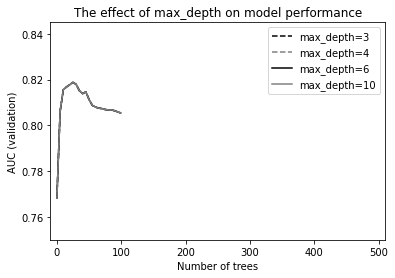

In [143]:
plt.figure(figsize=(6, 4))

plt.plot(tree, aucs_val_depth3, color='black', linestyle='dashed', label='max_depth=3')
plt.plot(tree, aucs_val_depth4, color='grey', linestyle='dashed', label='max_depth=4')
plt.plot(tree, aucs_val_eta_01, color='black', linestyle='solid', label='max_depth=6')
plt.plot(tree, aucs_val_depth10, color='grey', linestyle='solid', label='max_depth=10')

plt.ylim(0.75, 0.845)
plt.xlim(-10, 510)
plt.xticks(range(0, 501, 100))

plt.legend()

plt.title('The effect of max_depth on model performance')
plt.xlabel('Number of trees')
plt.ylabel('AUC (validation)')

# plt.savefig('ch06-figures/06_xgb_depth.svg')

plt.show()

In [144]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

[0]	train-auc:0.77424	val-auc:0.73571
[10]	train-auc:0.84733	val-auc:0.78964
[20]	train-auc:0.86359	val-auc:0.80617
[30]	train-auc:0.87855	val-auc:0.81478
[40]	train-auc:0.88701	val-auc:0.81990
[50]	train-auc:0.89458	val-auc:0.82595
[60]	train-auc:0.90159	val-auc:0.82807
[70]	train-auc:0.90650	val-auc:0.82801
[80]	train-auc:0.91110	val-auc:0.82940
[90]	train-auc:0.91428	val-auc:0.82997
[100]	train-auc:0.91801	val-auc:0.83221
[110]	train-auc:0.92205	val-auc:0.83290
[120]	train-auc:0.92460	val-auc:0.83285
[130]	train-auc:0.92843	val-auc:0.83414
[140]	train-auc:0.93100	val-auc:0.83463
[150]	train-auc:0.93296	val-auc:0.83525
[160]	train-auc:0.93551	val-auc:0.83554
[170]	train-auc:0.93788	val-auc:0.83638
[180]	train-auc:0.93971	val-auc:0.83657
[190]	train-auc:0.94203	val-auc:0.83562
[200]	train-auc:0.94334	val-auc:0.83512
[210]	train-auc:0.94501	val-auc:0.83546
[220]	train-auc:0.94693	val-auc:0.83508
[230]	train-auc:0.94839	val-auc:0.83417
[240]	train-auc:0.94999	val-auc:0.83336
[250]	train

In [145]:
tree, _, aucs_val_mcw1 = parse_xgb_output(output)
print(max(aucs_val_mcw1))
print(max(zip(aucs_val_mcw1, tree)))

0.81878
(0.81878, 25)


In [146]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 10,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

[0]	train-auc:0.77424	val-auc:0.73571
[10]	train-auc:0.84393	val-auc:0.78899
[20]	train-auc:0.86444	val-auc:0.80769
[30]	train-auc:0.87627	val-auc:0.81576
[40]	train-auc:0.88412	val-auc:0.81942
[50]	train-auc:0.88952	val-auc:0.82252
[60]	train-auc:0.89401	val-auc:0.82514
[70]	train-auc:0.89808	val-auc:0.82811
[80]	train-auc:0.90190	val-auc:0.82885
[90]	train-auc:0.90432	val-auc:0.82988
[100]	train-auc:0.90632	val-auc:0.83130
[110]	train-auc:0.90907	val-auc:0.83165
[120]	train-auc:0.91084	val-auc:0.83210
[130]	train-auc:0.91266	val-auc:0.83244
[140]	train-auc:0.91460	val-auc:0.83288
[150]	train-auc:0.91656	val-auc:0.83336
[160]	train-auc:0.91858	val-auc:0.83277
[170]	train-auc:0.92043	val-auc:0.83244
[180]	train-auc:0.92181	val-auc:0.83316
[190]	train-auc:0.92326	val-auc:0.83236
[200]	train-auc:0.92486	val-auc:0.83133
[210]	train-auc:0.92641	val-auc:0.83150
[220]	train-auc:0.92774	val-auc:0.83188
[230]	train-auc:0.92892	val-auc:0.83132
[240]	train-auc:0.93013	val-auc:0.83082
[250]	train

In [147]:
tree, _, aucs_val_mcw10 = parse_xgb_output(output)
print(max(aucs_val_mcw10))
print(max(zip(aucs_val_mcw10, tree)))

0.81878
(0.81878, 25)


In [148]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 30,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

[0]	train-auc:0.76588	val-auc:0.73459
[10]	train-auc:0.83603	val-auc:0.78479
[20]	train-auc:0.85758	val-auc:0.80196
[30]	train-auc:0.87037	val-auc:0.81556
[40]	train-auc:0.87717	val-auc:0.82100
[50]	train-auc:0.88124	val-auc:0.82436
[60]	train-auc:0.88472	val-auc:0.82819
[70]	train-auc:0.88691	val-auc:0.82971
[80]	train-auc:0.88894	val-auc:0.83074
[90]	train-auc:0.89163	val-auc:0.83233
[100]	train-auc:0.89334	val-auc:0.83354
[110]	train-auc:0.89534	val-auc:0.83391
[120]	train-auc:0.89678	val-auc:0.83424
[130]	train-auc:0.89783	val-auc:0.83458
[140]	train-auc:0.89886	val-auc:0.83465
[150]	train-auc:0.89994	val-auc:0.83511
[160]	train-auc:0.90107	val-auc:0.83543
[170]	train-auc:0.90206	val-auc:0.83529
[180]	train-auc:0.90319	val-auc:0.83471
[190]	train-auc:0.90438	val-auc:0.83438
[200]	train-auc:0.90527	val-auc:0.83451
[210]	train-auc:0.90616	val-auc:0.83410
[220]	train-auc:0.90703	val-auc:0.83417
[230]	train-auc:0.90822	val-auc:0.83400
[240]	train-auc:0.90909	val-auc:0.83385
[250]	train

In [149]:
tree, _, aucs_val_mcw30 = parse_xgb_output(output)
print(max(aucs_val_mcw30))
print(max(zip(aucs_val_mcw30, tree)))

0.81878
(0.81878, 25)


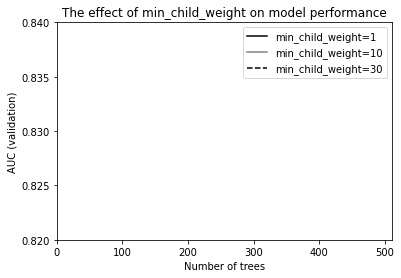

In [151]:
plt.figure(figsize=(6, 4))

plt.plot(tree, aucs_val_mcw1, color='black', linestyle='solid', label='min_child_weight=1')
plt.plot(tree, aucs_val_mcw10, color='grey', linestyle='solid', label='min_child_weight=10')
plt.plot(tree, aucs_val_mcw30, color='black', linestyle='dashed', label='min_child_weight=30')

plt.ylim(0.82, 0.84)
plt.xlim(0, 510)
plt.xticks(range(0, 501, 100))
plt.yticks(np.linspace(0.82, 0.84, 5))

plt.legend()

plt.title('The effect of min_child_weight on model performance')
plt.xlabel('Number of trees')
plt.ylabel('AUC (validation)')

# plt.savefig('ch06-figures/06_xgb_mcw.svg')

plt.show()

In [152]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

[0]	train-auc:0.77424	val-auc:0.73571
[10]	train-auc:0.84733	val-auc:0.78964
[20]	train-auc:0.86359	val-auc:0.80617
[30]	train-auc:0.87855	val-auc:0.81478
[40]	train-auc:0.88701	val-auc:0.81990
[50]	train-auc:0.89458	val-auc:0.82595
[60]	train-auc:0.90159	val-auc:0.82807
[70]	train-auc:0.90650	val-auc:0.82801
[80]	train-auc:0.91110	val-auc:0.82940
[90]	train-auc:0.91428	val-auc:0.82997
[100]	train-auc:0.91801	val-auc:0.83221
[110]	train-auc:0.92205	val-auc:0.83290
[120]	train-auc:0.92460	val-auc:0.83285
[130]	train-auc:0.92843	val-auc:0.83414
[140]	train-auc:0.93100	val-auc:0.83463
[150]	train-auc:0.93296	val-auc:0.83525
[160]	train-auc:0.93551	val-auc:0.83554
[170]	train-auc:0.93788	val-auc:0.83638
[180]	train-auc:0.93971	val-auc:0.83657
[190]	train-auc:0.94203	val-auc:0.83562
[200]	train-auc:0.94334	val-auc:0.83512
[210]	train-auc:0.94501	val-auc:0.83546
[220]	train-auc:0.94693	val-auc:0.83508
[230]	train-auc:0.94839	val-auc:0.83417
[240]	train-auc:0.94999	val-auc:0.83336
[250]	train

In [153]:
print(output)


[0]	train-auc:0.86300	val-auc:0.76818
[5]	train-auc:0.92863	val-auc:0.80606
[10]	train-auc:0.95002	val-auc:0.81558
[15]	train-auc:0.96558	val-auc:0.81680
[20]	train-auc:0.97316	val-auc:0.81775
[25]	train-auc:0.98174	val-auc:0.81878
[30]	train-auc:0.98772	val-auc:0.81788
[35]	train-auc:0.99180	val-auc:0.81510
[40]	train-auc:0.99456	val-auc:0.81387
[45]	train-auc:0.99596	val-auc:0.81462
[50]	train-auc:0.99688	val-auc:0.81128
[55]	train-auc:0.99787	val-auc:0.80874
[60]	train-auc:0.99889	val-auc:0.80801
[65]	train-auc:0.99919	val-auc:0.80751
[70]	train-auc:0.99944	val-auc:0.80732
[75]	train-auc:0.99964	val-auc:0.80692
[80]	train-auc:0.99985	val-auc:0.80677
[85]	train-auc:0.99986	val-auc:0.80671
[90]	train-auc:0.99991	val-auc:0.80637
[95]	train-auc:0.99996	val-auc:0.80580
[99]	train-auc:0.99997	val-auc:0.80546



In [154]:
tree, _, aucs_val = parse_xgb_output(output)
print(max(aucs_val))

0.81878


In [155]:
max(zip(aucs_val, tree))


(0.81878, 25)

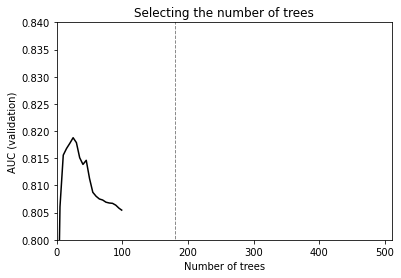

In [156]:
plt.figure(figsize=(6, 4))

plt.plot(tree, aucs_val, color='black', linestyle='solid')


plt.ylim(0.80, 0.84)
plt.xlim(0, 510)
plt.xticks(range(0, 501, 100))
plt.yticks(np.linspace(0.80, 0.84, 9))


plt.vlines(180, 0, 1, color='grey', linestyle='dashed', linewidth=0.9)

plt.title('Selecting the number of trees')
plt.xlabel('Number of trees')
plt.ylabel('AUC (validation)')

# plt.savefig('ch06-figures/06_xgb_number_trees.svg')

plt.show()


In [157]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=180, verbose_eval=10,
                  evals=watchlist)

[0]	train-auc:0.77424	val-auc:0.73571
[10]	train-auc:0.84733	val-auc:0.78964
[20]	train-auc:0.86359	val-auc:0.80617
[30]	train-auc:0.87855	val-auc:0.81478
[40]	train-auc:0.88701	val-auc:0.81990
[50]	train-auc:0.89458	val-auc:0.82595
[60]	train-auc:0.90159	val-auc:0.82807
[70]	train-auc:0.90650	val-auc:0.82801
[80]	train-auc:0.91110	val-auc:0.82940
[90]	train-auc:0.91428	val-auc:0.82997
[100]	train-auc:0.91801	val-auc:0.83221
[110]	train-auc:0.92205	val-auc:0.83290
[120]	train-auc:0.92460	val-auc:0.83285
[130]	train-auc:0.92843	val-auc:0.83414
[140]	train-auc:0.93100	val-auc:0.83463
[150]	train-auc:0.93296	val-auc:0.83525
[160]	train-auc:0.93551	val-auc:0.83554
[170]	train-auc:0.93788	val-auc:0.83638
[179]	train-auc:0.93962	val-auc:0.83648


In [158]:
y_pred_xgb = model.predict(dval)


In [159]:
roc_auc_score(y_val, y_pred_xgb)


0.8364807100821002

In [160]:
print(roc_auc_score(y_val, y_pred_dt))
print(roc_auc_score(y_val, y_pred_rf))
print(roc_auc_score(y_val, y_pred_xgb))

0.7850954203095104
0.8253826499721489
0.8364807100821002


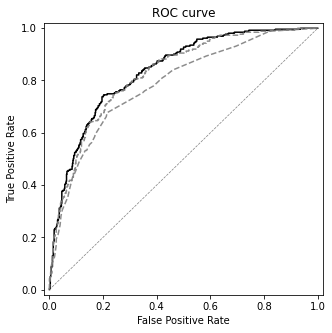

In [161]:
plt.figure(figsize=(5, 5))

fpr, tpr, _ = roc_curve(y_val, y_pred_xgb)
plt.plot(fpr, tpr, color='black')

fpr, tpr, _ = roc_curve(y_val, y_pred_rf)
plt.plot(fpr, tpr, color='grey', linestyle='dashed', alpha=0.9)

fpr, tpr, _ = roc_curve(y_val, y_pred_dt)
plt.plot(fpr, tpr, color='grey', linestyle='dashed', alpha=0.9)

plt.plot([0, 1], [0, 1], color='black', lw=0.7, linestyle='dashed', alpha=0.5)

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC curve')

plt.show()

In [162]:
y_train_full = (df_train_full.status == 'default').values
y_test = (df_test.status == 'default').values

del df_train_full['status']
del df_test['status']

In [163]:
dict_train_full = df_train_full.fillna(0).to_dict(orient='records')
dict_test = df_test.fillna(0).to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_train_full = dv.fit_transform(dict_train_full)
X_test = dv.transform(dict_test)

In [164]:
rf_final = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_leaf=5, random_state=1)
rf_final.fit(X_train_full, y_train_full)

y_pred_rf = rf.predict_proba(X_test)[:, 1]

In [165]:
dtrain_full = xgb.DMatrix(X_train_full, label=y_train_full, feature_names=dv.feature_names_)
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=dv.feature_names_)

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

num_trees = 160

xgb_final = xgb.train(xgb_params, dtrain_full, num_boost_round=num_trees)

In [166]:
y_pred_xgb = xgb_final.predict(dtest)


In [167]:
print(roc_auc_score(y_test, y_pred_rf))
print(roc_auc_score(y_test, y_pred_xgb))

0.8241777039245393
0.8322845901959826


In [168]:
dt.feature_importances_


array([0.01600051, 0.04970444, 0.12051523, 0.00833288, 0.0250906 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.18548089, 0.00699145, 0.        ,
       0.        , 0.17292753, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.0302163 ,
       0.24421676, 0.        , 0.12658146, 0.01394197])

In [169]:
list(zip(dv.feature_names_, dt.feature_importances_))


[('age', 0.016000509929902092),
 ('amount', 0.04970443671934234),
 ('assets', 0.12051522618539554),
 ('debt', 0.008332876385504904),
 ('expenses', 0.02509060257588133),
 ('home=ignore', 0.0),
 ('home=other', 0.0),
 ('home=owner', 0.0),
 ('home=parents', 0.0),
 ('home=private', 0.0),
 ('home=rent', 0.0),
 ('home=unk', 0.0),
 ('income', 0.185480885992072),
 ('job=fixed', 0.006991445659436668),
 ('job=freelance', 0.0),
 ('job=others', 0.0),
 ('job=partime', 0.17292752964348088),
 ('job=unk', 0.0),
 ('marital=divorced', 0.0),
 ('marital=married', 0.0),
 ('marital=separated', 0.0),
 ('marital=single', 0.0),
 ('marital=unk', 0.0),
 ('marital=widow', 0.0),
 ('price', 0.030216298419676546),
 ('records=no', 0.2442167576209344),
 ('records=yes', 0.0),
 ('seniority', 0.12658145602795504),
 ('time', 0.013941974840418335)]

In [170]:
importances = list(zip(dv.feature_names_, dt.feature_importances_))

df_importance = pd.DataFrame(importances, columns=['feature', 'gain'])
df_importance = df_importance.sort_values(by='gain', ascending=False)
df_importance

,feature,gain
25,records=no,0.244217
12,income,0.185481
16,job=partime,0.172928
27,seniority,0.126581
2,assets,0.120515
1,amount,0.049704
24,price,0.030216
4,expenses,0.025091
0,age,0.016001
28,time,0.013942


In [171]:
df_importance = df_importance[df_importance.gain > 0]


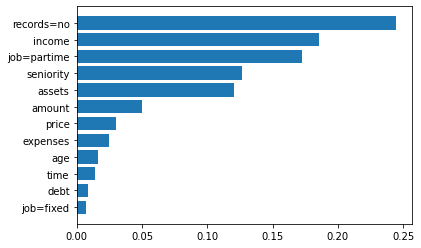

In [172]:
num = len(df_importance)
plt.barh(range(num), df_importance.gain[::-1])
plt.yticks(range(num), df_importance.feature[::-1])

plt.show()

In [173]:
rf.feature_importances_


array([5.81509463e-02, 8.42444361e-02, 7.75901403e-02, 1.33739427e-02,
       3.62995916e-02, 1.26998064e-06, 5.25854792e-03, 2.57383446e-02,
       8.51497558e-03, 3.24437831e-03, 1.44619658e-02, 0.00000000e+00,
       1.50682384e-01, 4.78310889e-02, 9.96408243e-03, 2.85512508e-03,
       5.65260797e-02, 0.00000000e+00, 2.43128646e-04, 6.42996557e-03,
       1.68784119e-03, 6.67458246e-03, 0.00000000e+00, 1.97498337e-04,
       6.62193254e-02, 8.41683921e-02, 8.30420483e-02, 1.25453198e-01,
       3.11467205e-02])

In [174]:
importances = list(zip(dv.feature_names_, rf.feature_importances_))

df_importance = pd.DataFrame(importances, columns=['feature', 'gain'])
df_importance = df_importance.sort_values(by='gain', ascending=False)
df_importance

,feature,gain
12,income,0.150682
27,seniority,0.125453
1,amount,0.084244
25,records=no,0.084168
26,records=yes,0.083042
2,assets,0.077590
24,price,0.066219
0,age,0.058151
16,job=partime,0.056526
13,job=fixed,0.047831


In [175]:
df_importance = df_importance[df_importance.gain > 0.01]


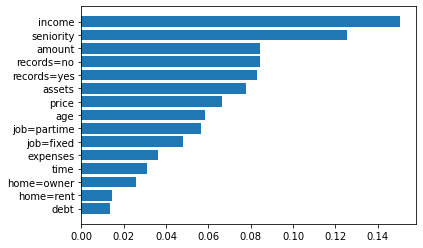

In [176]:
num = len(df_importance)
plt.barh(range(num), df_importance.gain[::-1])
plt.yticks(range(num), df_importance.feature[::-1])

plt.show()

In [177]:
scores = model.get_score(importance_type='gain')
scores = sorted(scores.items(), key=lambda x: x[1])
list(reversed(scores))

[('records=no', 20.205886172916674),
 ('job=partime', 19.571840249333327),
 ('job=fixed', 14.703467482368419),
 ('home=owner', 12.168287986666668),
 ('seniority', 10.932046450639472),
 ('income', 8.676314026390978),
 ('assets', 5.918307806556342),
 ('amount', 5.400780562456791),
 ('time', 5.0175909627586215),
 ('home=parents', 4.499092019090908),
 ('home=rent', 4.028717651875),
 ('price', 3.794684632054546),
 ('expenses', 3.589669993872826),
 ('age', 3.318183602376148),
 ('debt', 2.9418528525873007),
 ('marital=separated', 2.641880279076923),
 ('home=private', 2.4620430769999997),
 ('marital=married', 2.427789335636364),
 ('home=other', 2.301698443333333),
 ('job=freelance', 2.25929752),
 ('job=others', 1.61876595),
 ('home=ignore', 0.7887506362000001)]

In [178]:
scores = model.get_score(importance_type='weight')
scores = sorted(scores.items(), key=lambda x: x[1])
list(reversed(scores))

[('price', 165),
 ('amount', 162),
 ('assets', 142),
 ('income', 133),
 ('seniority', 119),
 ('age', 109),
 ('expenses', 92),
 ('debt', 63),
 ('records=no', 60),
 ('time', 29),
 ('home=parents', 22),
 ('job=partime', 21),
 ('job=fixed', 19),
 ('marital=separated', 13),
 ('home=private', 12),
 ('marital=married', 11),
 ('home=rent', 8),
 ('home=owner', 6),
 ('home=ignore', 5),
 ('job=freelance', 4),
 ('home=other', 3),
 ('job=others', 1)]

In [179]:
names = [n for (n, s) in scores]
scores = [s for (n, s) in scores]

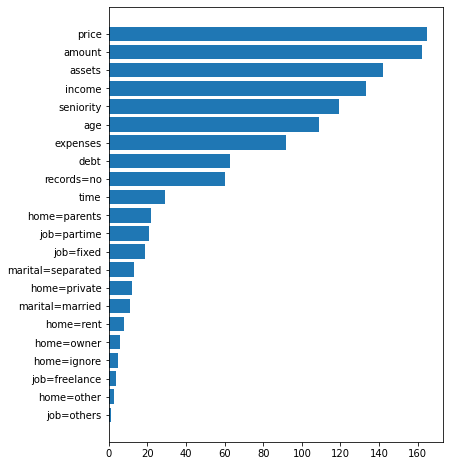

In [180]:
plt.figure(figsize=(6, 8))

plt.barh(np.arange(len(scores)), scores)
plt.yticks(np.arange(len(names)), names)

plt.show()

In [181]:
from sklearn.ensemble import ExtraTreesClassifier


In [182]:
aucs = []

for i in range(10, 201, 10):
    rf = ExtraTreesClassifier(n_estimators=i, max_depth=30)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print('%s -> %.3f' % (i, auc))
    aucs.append(auc)

10 -> 0.761
20 -> 0.777
30 -> 0.789
40 -> 0.780
50 -> 0.793
60 -> 0.799
70 -> 0.796
80 -> 0.787
90 -> 0.792
100 -> 0.792
110 -> 0.793
120 -> 0.795
130 -> 0.787
140 -> 0.797
150 -> 0.794
160 -> 0.796
170 -> 0.794
180 -> 0.798
190 -> 0.797
200 -> 0.796
